## Task 2 - IRIS FLOWER CLASSIFICATION
### By Saad Bin Farooq

### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data and EDA (Explolatory Data Analysis)

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot: >

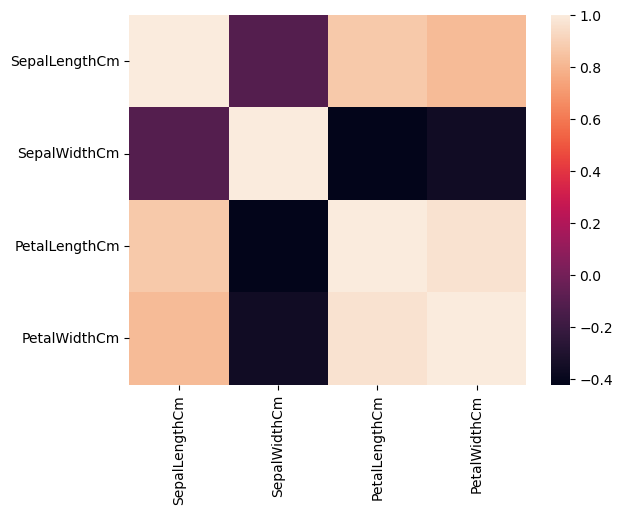

In [3]:
data = data.drop('Id', axis = 1)
sns.heatmap(data.corr(numeric_only = True))

(array([0, 1, 2]),
 [Text(0, 0, 'Iris-setosa'),
  Text(1, 0, 'Iris-versicolor'),
  Text(2, 0, 'Iris-virginica')])

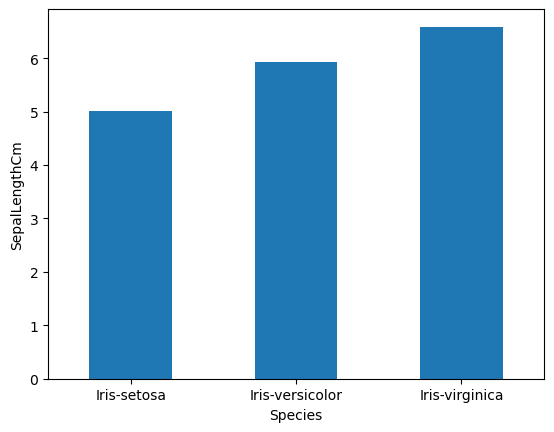

In [4]:
data.groupby('Species')['SepalLengthCm'].mean().plot(kind = 'bar')
plt.ylabel('SepalLengthCm')
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Iris-setosa'),
  Text(1, 0, 'Iris-versicolor'),
  Text(2, 0, 'Iris-virginica')])

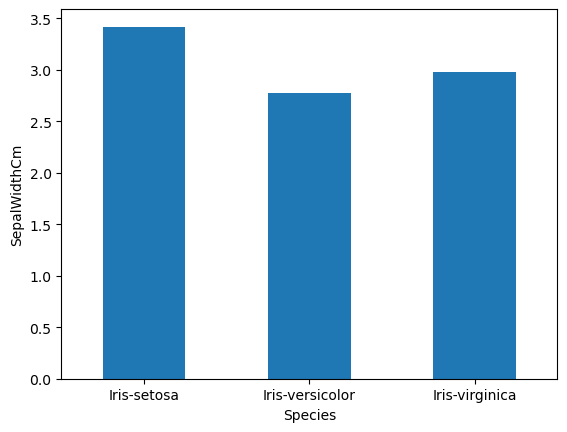

In [5]:
data.groupby('Species')['SepalWidthCm'].mean().plot(kind = 'bar')
plt.ylabel('SepalWidthCm')
plt.xticks(rotation = 0)

Text(0, 0.5, 'PetalLengthCm')

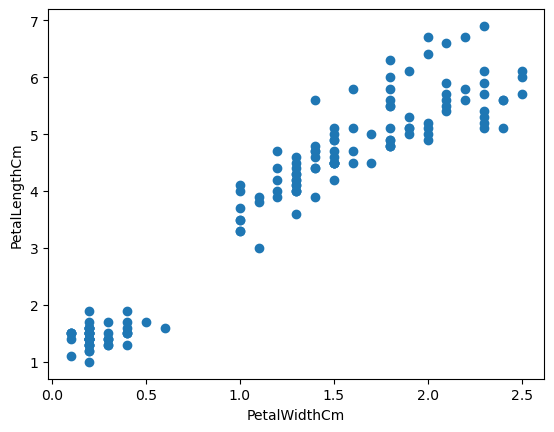

In [6]:
plt.scatter(x = data['PetalWidthCm'], y = data['PetalLengthCm'])
plt.xlabel('PetalWidthCm')
plt.ylabel('PetalLengthCm')

### Removing features with high autocorrelation

In [7]:
data = data.drop('PetalWidthCm', axis = 1)
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
Species           object
dtype: object

## Model Selection and Evaluation

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

### Preprocessing Data

In [9]:
encoder = LabelEncoder()
encoder.fit(data['Species'])
data['Species'] = encoder.transform(data['Species'])
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
X = data.drop('Species', axis = 1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Model Comaprision

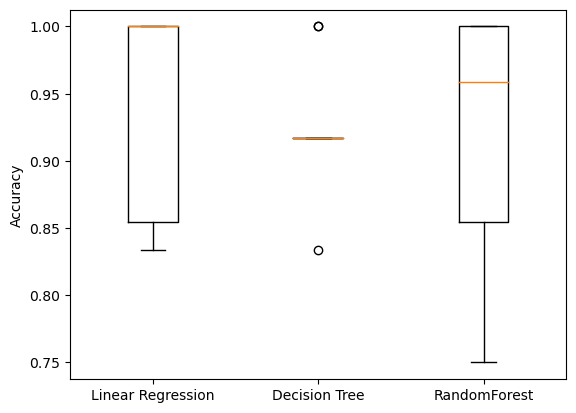

In [11]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]
names = ['Linear Regression', 'Decision Tree', 'RandomForest']
results = []

for model in models:
    
    result = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 10)
    results.append(result)

plt.boxplot(results, labels = names)
plt.ylabel('Accuracy')
plt.show()

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)


print('F1 Score: ', f1_score(y_test, preds, average = 'weighted'))
print('Accuracy: ', model.score(X_test, y_test))

F1 Score:  1.0
Accuracy:  1.0
